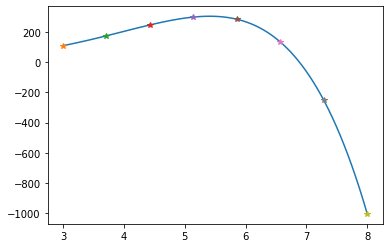

In [12]:
## plik glowny programu interpolacja Newtona

import numpy as np
from matplotlib import pyplot as plt


def eval_poly(x, n, xxi, coefs):
    # --funkcja wyznaczaa wartosci wielomianu Newtona wydajna metoda
    p = coefs[0, max(coefs.shape) - 1]
    for k in range(n - 1, 0, -1):
        # print(k)
        p = p * (x - xxi[0, k - 1]) + coefs[0, k - 1]
    px = p
    return px


nPoints = 8
xi = np.linspace(3, 8, nPoints)
xi = np.asanyarray(xi)
xi = np.array(xi)[np.newaxis]
xx = np.linspace(3, 8, nPoints * 10)
xx = np.asanyarray(xx)
xx = np.array(xx)[np.newaxis]  # -- zeby postrzegal to jako konstrukcje 1xn (tablice)

yi = -0.2 * xi ** 5 + 1.3 * xi ** 4 + 2.7 * xi ** 2 + 4.3 * xi + 16

mat = np.zeros((nPoints, nPoints + 1))

##--wpisuje kolumnami

for i in range(0, max(mat.shape) - 1):
    mat[i, 0] = xi[0, i]
    mat[i, 1] = yi[0, i]
ax = 1

## tworze strukture trojkatne macierzy

for k in range(1, nPoints - 1):
    # print(k)
    for r in range(k, nPoints):
        # print(r)
        mat[r, k + 1] = ((mat[r, k] - mat[r - 1, k]) / (mat[r, 0] - mat[r - ax, 0]))
    ax += 1

coefs = np.diag(mat[:, 1::])
coefs = np.array(coefs)[np.newaxis]
# --konvertuje do amcierzy-
coefs = np.asanyarray(coefs)
# print(coefs)
yy = np.zeros((1, max(xx.shape)))
# print(max(coefs.shape))

# --wywolanie funkcji wyznaczajacej wartosci wielomianu

for i in range(0, max(xx.shape)):
    yy[0, i] = eval_poly(xx[0, i], nPoints, xi, coefs)

plt.plot(xx[0, :], yy[0, :], xi, yi, '*')
plt.show()